<a href="https://colab.research.google.com/github/NMtuzula/Prediction-of-Product-Sales/blob/main/Headers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Nonelwa Mtuzula

## Project Overview

## Load and Inspect Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import parckages
import pandas as pd

#find the path of the sales_predictions
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df_predictions = pd.read_csv(fpath)

In [3]:
#Diplay the first five rows
df_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#Display the last five rows
df_predictions.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
#Display the info for the data
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB



<h8>1. How many rows and columns?
- 'There are 8523 rows'
-'There are 12 columns'


## Clean Data

In [6]:
#Checking data types for object column
df_predictions.select_dtypes('object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [7]:
#Identifying duplicates
df_predictions.duplicated()

#Getting the sum of duplicated rows
df_predictions.duplicated().sum()

0

In [8]:
#See if all values are unique
uniq_val = df_predictions.nunique()
uniq_val

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [9]:
#checking the % of unique values using the above
df_predictions.nunique() / len(df_predictions) * 100

Item_Identifier              18.291681
Item_Weight                   4.869178
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.035199
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

In [10]:
#identifying missing values
missing_values = df_predictions.isna().sum()
missing_values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
#Calculating the % of missing values per column
missing_values_perc = missing_values / len(df_predictions) * 100
missing_values_perc

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [12]:
#Addressing missing values by using a placeholder value
cat_columns = df_predictions.select_dtypes('object').columns
cat_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [13]:
#Filling missing values with placeholder MISSING
df_predictions[cat_columns] = df_predictions[cat_columns].fillna('MISSING')

In [14]:
#saving a list of numeric column names
num_columns = df_predictions.select_dtypes('number').columns
num_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
#filling missing numeric columns with placeholder -1
df_predictions[num_columns] = df_predictions[num_columns].fillna('-1')

In [16]:
#Confirming that there are no missing values
df_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
#Finding inconsistent categoriesof data
string_column = df_predictions.select_dtypes('object').columns
string_column

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [18]:
#check unique values on string_column
string_column.nunique()

8

In [19]:
#remaking th list of string columns
str_col = df_predictions.select_dtypes('object').columns
for col in str_col:
  print(df_predictions[col].value_counts())
  print('\n')

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


-1       1463
12.15      86
17.6       82
13.65      77
11.8       76
         ... 
7.275       2
7.685       1
9.42        1
6.52        1
5.4         1
Name: Item_Weight, Length: 416, dtype: int64


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type,

In [20]:
#Checking inconsistency by checking value_counts Item_Fat_Content
df_predictions['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [21]:
#Replacing 'LF', 'low fat' with 'Low Fat' and 'reg' with 'Regular'
df_predictions['Item_Fat_Content'] = df_predictions['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})
df_predictions['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [22]:
#Checking inconsistency by using value_counts for Outlet_Identifier
df_predictions['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [23]:
#Replacing the single sting out with an empty string
df_predictions['Outlet_Identifier'] = df_predictions['Outlet_Identifier'].str.replace('OUT', '')
df_predictions['Outlet_Identifier'].value_counts()

027    935
013    932
049    930
046    930
035    930
045    929
018    928
017    926
010    555
019    528
Name: Outlet_Identifier, dtype: int64

In [24]:
#Numerical columns
num_col = df_predictions.select_dtypes('number').columns
num_col

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales'],
      dtype='object')

In [25]:
#importing necessary packages
import numpy as np

#finding the mean for num_cols
np.mean(df_predictions[num_col])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64

In [26]:
#Calculating the min
df_predictions[num_col].min()

Item_Visibility                 0.00
Item_MRP                       31.29
Outlet_Establishment_Year    1985.00
Item_Outlet_Sales              33.29
dtype: float64

In [27]:
#Calculating the max
df_predictions[num_col].max()

Item_Visibility                  0.328391
Item_MRP                       266.888400
Outlet_Establishment_Year     2009.000000
Item_Outlet_Sales            13086.964800
dtype: float64

## Exploratory Data Analysis

Project 1 - Part 3

In [29]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap to view the correlation between features

In [30]:
# Find correlations
corr = df_predictions.corr(numeric_only = True)
corr.round(2)

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,1.00,-0.00,-0.07,-0.13
Item_MRP,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.13,0.57,-0.05,1.00


<Axes: >

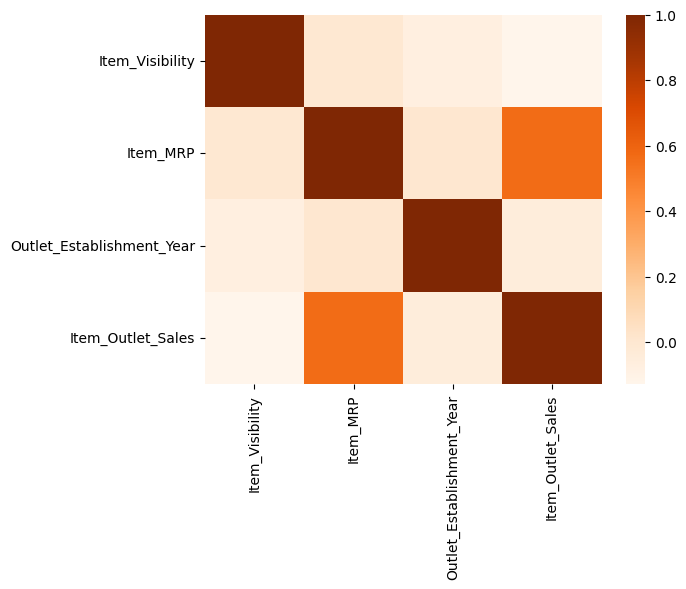

In [33]:
# heatmap using the correlations from above
sns.heatmap(corr, cmap = "Oranges")

There is a negative correlation on the above.

In [34]:
#Histogram on numerical features
num_col = df_predictions.select_dtypes('number').columns
num_col

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales'],
      dtype='object')

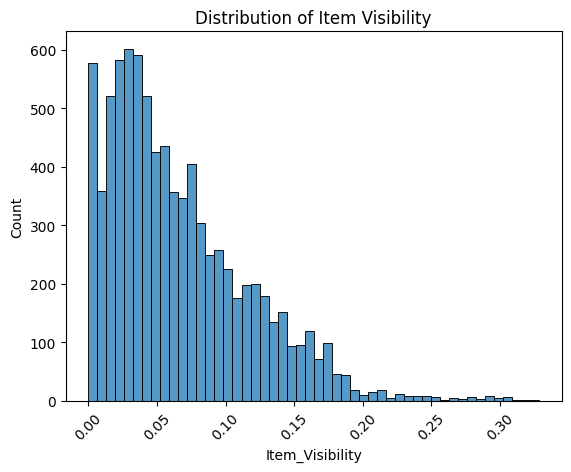

In [35]:
#Distribution of Item_visibility
ax = sns.histplot(data = df_predictions, x ='Item_Visibility')
ax.ticklabel_format(style = 'plain');
ax.tick_params(axis = 'x', rotation = 45);
ax.set_title('Distribution of Item Visibility');

The item visibility has a negative correlation.

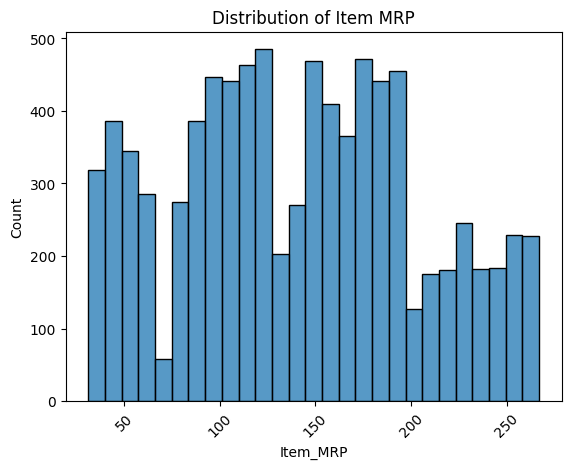

In [36]:
#Distribution of Item_MRP
ax = sns.histplot(data = df_predictions, x ='Item_MRP')
ax.ticklabel_format(style = 'plain');
ax.tick_params(axis = 'x', rotation = 45);
ax.set_title('Distribution of Item MRP');

There is no correlation for the Item MRP

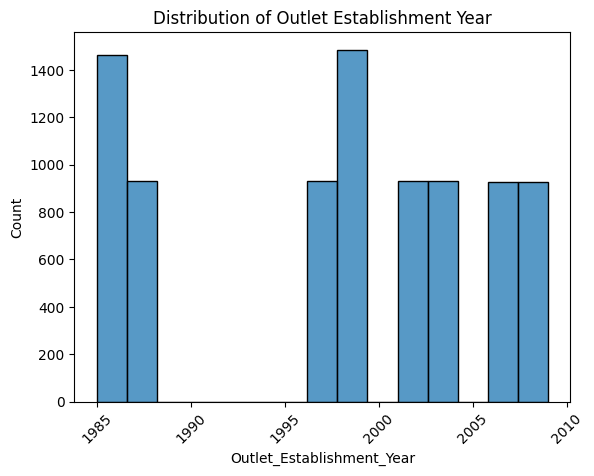

In [37]:
#Distribution of Outlet_Establishment_Year
ax = sns.histplot(data = df_predictions, x ='Outlet_Establishment_Year')
ax.ticklabel_format(style = 'plain');
ax.tick_params(axis = 'x', rotation = 45);
ax.set_title('Distribution of Outlet Establishment Year');

The outlet establishment year has been constant after the year 2000.

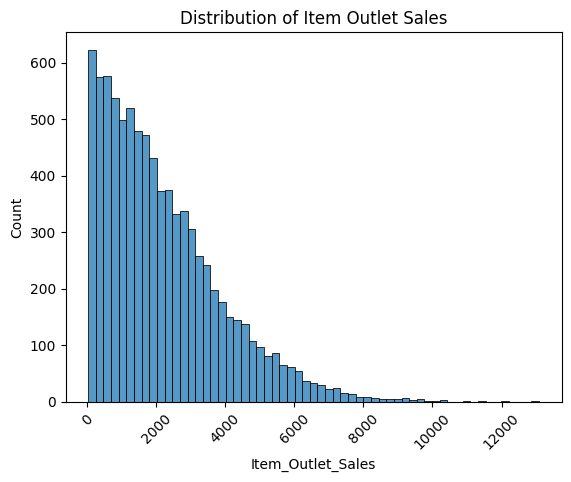

In [38]:
#Distribution of Item_Outlet_Sales
ax = sns.histplot(data = df_predictions, x ='Item_Outlet_Sales')
ax.ticklabel_format(style = 'plain');
ax.tick_params(axis = 'x', rotation = 45);
ax.set_title('Distribution of Item Outlet Sales');

The above distribution has a negative correlation and the graph is right skewed.

#Boxplots to view statictical summaries of numerical features

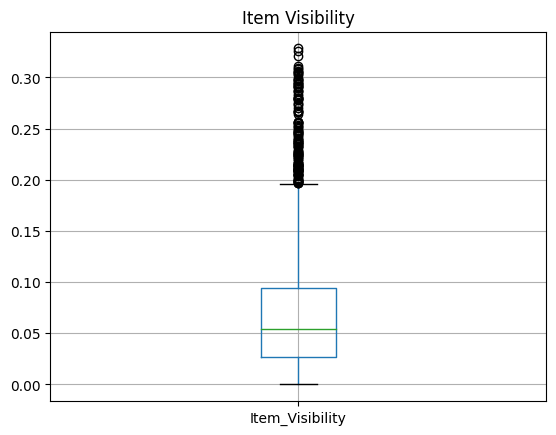

In [39]:
#Box plot for Item_Visibility using pandas
ax = df_predictions.boxplot(column = 'Item_Visibility')
ax.set_title('Item Visibility');

There are outlires that are above the average of Item Visibility.

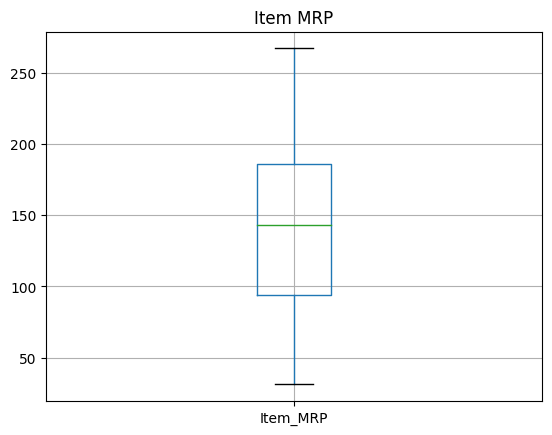

In [40]:
#Box plot for Item_Visibility using pandas
ax = df_predictions.boxplot(column = 'Item_MRP')
ax.set_title('Item MRP');

There is no correlation for the item MRP as the average is in the centre of the data.

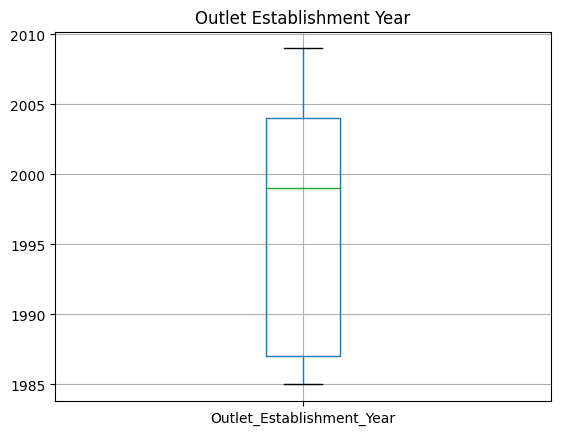

In [41]:
#Box plot for Item_Visibility using pandas
ax = df_predictions.boxplot(column = 'Outlet_Establishment_Year')
ax.set_title('Outlet Establishment Year');

The outlet is skewed to the right, there are no ouliers.

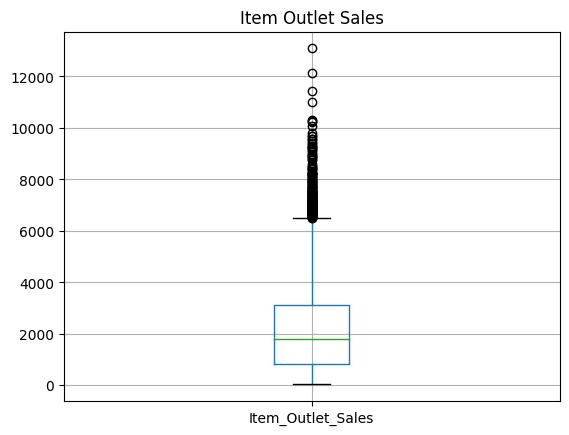

In [42]:
#Box plot for Item_Visibility using pandas
ax = df_predictions.boxplot(column = 'Item_Outlet_Sales')
ax.set_title('Item Outlet Sales');

There are outliers for the Item outlet sales.

# Countplots to view the frequency of each class of categorical features.

In [43]:
#Viewing the object data types
cat_value = df_predictions.select_dtypes('object').columns
cat_value

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [44]:
#Checking value counts for cat values above
df_predictions[cat_value].value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Type              Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type      
DRA12            11.6         Low Fat           Soft Drinks            010                MISSING      Tier 3                Grocery Store        1
FDV28            16.1         Regular           Frozen Foods           010                MISSING      Tier 3                Grocery Store        1
FDV32            7.785        Low Fat           Fruits and Vegetables  049                Medium       Tier 1                Supermarket Type1    1
                                                                       045                MISSING      Tier 2                Supermarket Type1    1
                                                                       035                Small        Tier 2                Supermarket Type1    1
                                                                                                                     

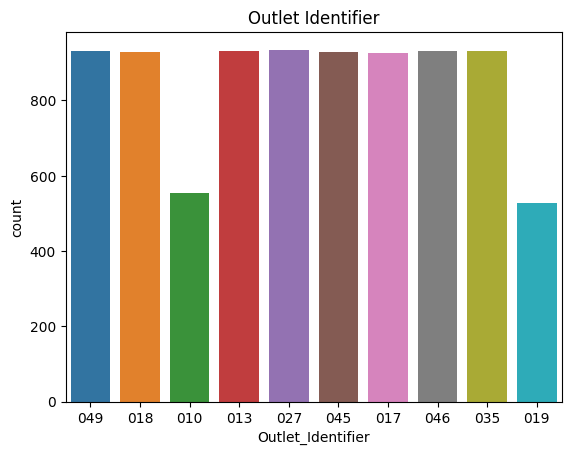

In [45]:
#Countplot for outlet identifier
ax = sns.countplot(data = df_predictions, x = 'Outlet_Identifier')
ax.set_title('Outlet Identifier');

010 and 019 have the least count compared to the other outlet identifiers.

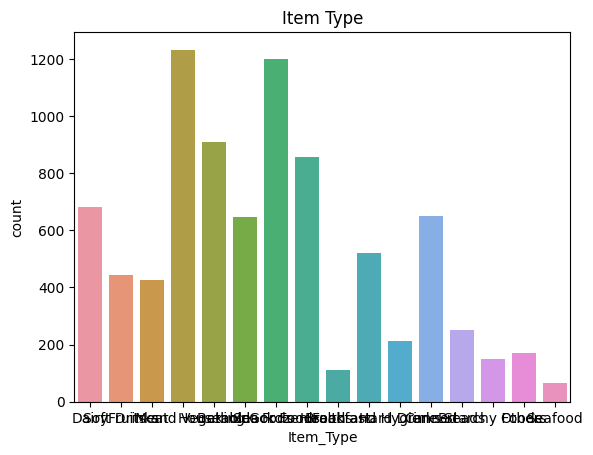

In [46]:
#Countplot for Item type
ax = sns.countplot(data = df_predictions, x = 'Item_Type')
ax.set_title('Item Type');

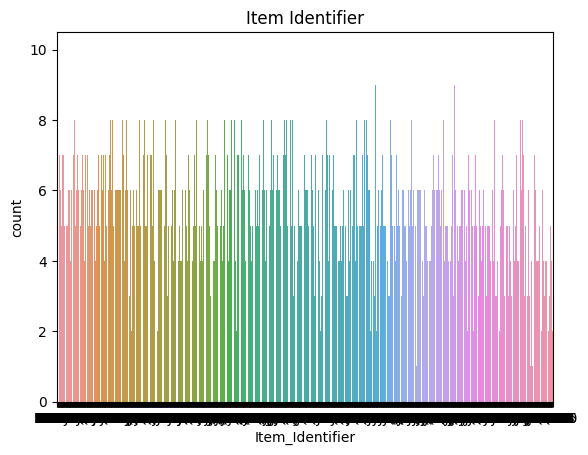

In [48]:
ax = sns.countplot(data = df_predictions, x = 'Item_Identifier')
ax.set_title('Item Identifier');

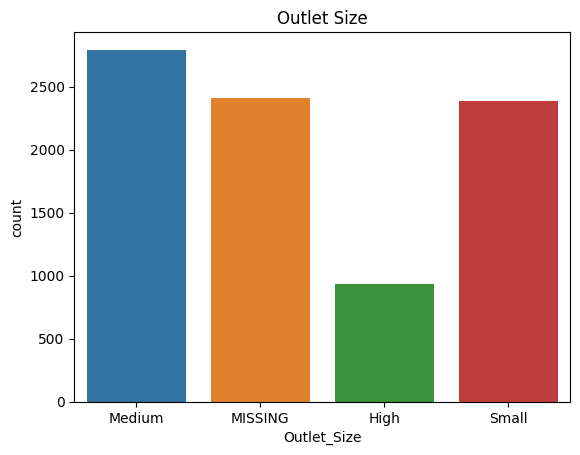

In [49]:
#countplot outlet size
ax = sns.countplot(data = df_predictions, x = 'Outlet_Size')
ax.set_title('Outlet Size');

The count for the medium outlet size has the highest compared to the others.

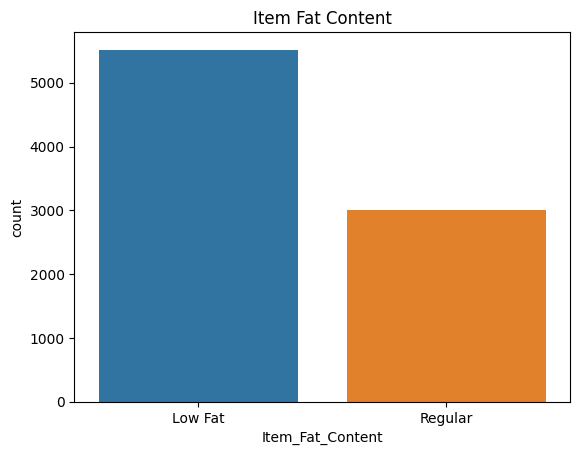

In [50]:
#countplot Item_Fat_Content
ax = sns.countplot(data = df_predictions, x = 'Item_Fat_Content')
ax.set_title('Item Fat Content');

Regular has the lowest average count than the Low Fat.

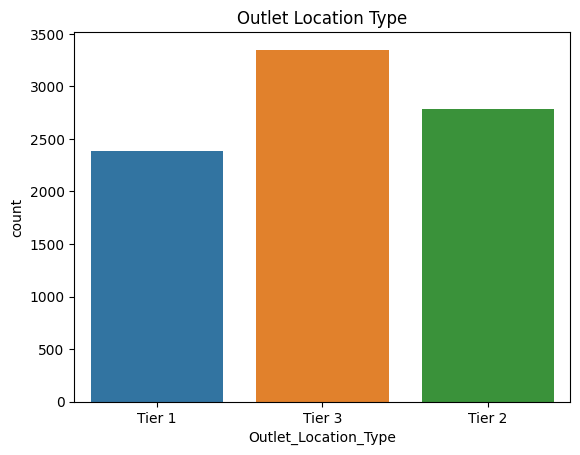

In [51]:
#countplot Outlet_Location_Type
ax = sns.countplot(data = df_predictions, x = 'Outlet_Location_Type')
ax.set_title('Outlet Location Type');

Tier 3 has the higest average count from tier 1 and 2.

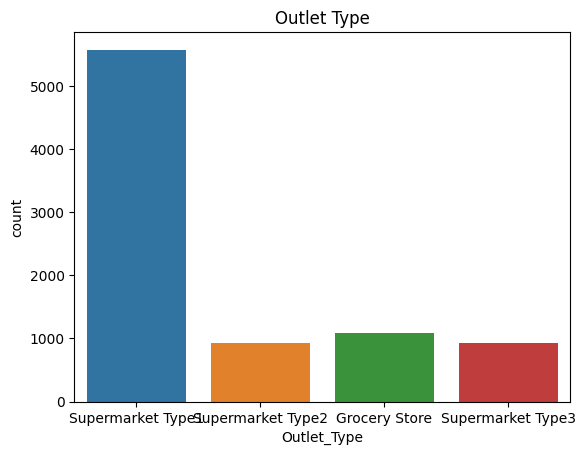

In [52]:
#countplot Outlet_Type
ax = sns.countplot(data = df_predictions, x = 'Outlet_Type')
ax.set_title('Outlet Type');

The supermarket has the highest average count from the other outlet types.

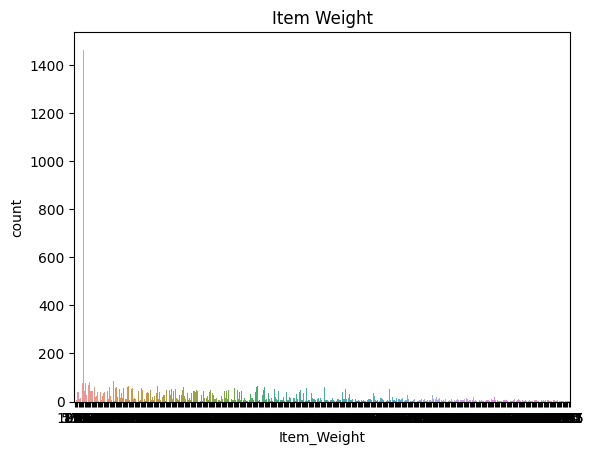

In [53]:
#countplot for Item_Weight
ax = sns.countplot(data = df_predictions, x = 'Item_Weight')
ax.set_title('Item Weight');

## Feature Inspection